# Ejemplo de uso de Yolo v8

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/4-Vision-DL/4-2-Ejemplo-Deteccion-Yolov8.ipynb)


Se requiere la instalación de `ultralytics`. Luego se importa `YOLO`. Más información sobre este modelo se puede encontrar [aquí](https://docs.ultralytics.com/modes/predict)

In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.1/752.1 kB 10.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

## 1.&nbsp;Predicción con el modelo pre-entrenado

Para cargar el modelo se crea una instancia de `YOLO` y se descarga el modelo pre-entrenado `yolov8m.pt` (por defecto se descarga del repositorio github de Ultralytics). Todos los modelos de YOLOv8 han sido entrenados en el dataset de COCO, que contiene 80 tipos diferentes de objetos.

In [ ]:
modelo = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 310MB/s]


Para realizar la predicción en una imagen, se utiliza el método `predict`, el cual detecta los recuadros delimitadores de todos los objetos que el modelo puede encontrar en la imagen. Este método acepta diferentes tipos de entradas, como la ruta a una imagen, un arreglo de rutas a imágenes, una imagen de PIL (una biblioteca de Python), entre otros.

In [ ]:
# Predecir con una confianza mayor a 0.5
resultados = modelo.predict("cat-dog.jpg", conf=0.5)


image 1/1 /content/cat-dog.jpg: 448x640 2 cats, 1 dog, 3441.0ms
Speed: 5.9ms preprocess, 3441.0ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


La salida contiene los objetos detectados. Se puede identificar cuántos objetos detectados hay en la imagen inspeccionando la longitud del atributo `boxes`.

In [ ]:
resultado = resultados[0]

# Cantidad de objetos detectados
print("Objetos detectados:", len(resultado.boxes))

Objetos detectados: 3


Se puede inspeccionar el contenido de cada recuadro delimitador encontrado usando los atributos de cada elemento de `resultado.boxes`. Por ejemplo, se puede observar el contenido del primer recuadro como `resultado.boxes[0]`. Algunas de las propiedades son

* `xyxy`: coordenadas del recuadro delimitador en formato [x1,y1,x2,y2]
* `cls`: ID del objeto (los nombres de todas las clases se encuentran en el diccionario `names`.
* `conf`: nivel de confianza del modelo sobre el objeto. Si es muy pequeño (< 0.5) se puede ignorar el recuadro.

In [ ]:
# resultado.boxes[0]

In [ ]:
# Para cada objeto detectado se obtendrá información
for box in resultado.boxes:
    class_id = resultado.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)

    print("Tipo de objeto:", class_id)
    print("Coordenadas:", cords)
    print("Probabilidad:", conf)
    print("---")

Tipo de objeto: dog
Coordenadas: [1, 88, 526, 409]
Probabilidad: 0.96
---
Tipo de objeto: cat
Coordenadas: [404, 205, 639, 388]
Probabilidad: 0.91
---
Tipo de objeto: cat
Coordenadas: [635, 302, 724, 477]
Probabilidad: 0.79
---
Tipo de objeto: bed
Coordenadas: [3, 368, 674, 477]
Probabilidad: 0.43
---


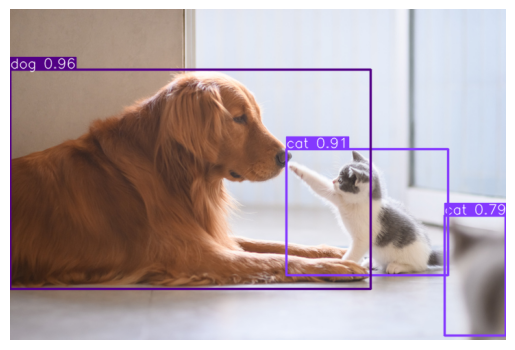

In [ ]:
# Imagen resultante (con recuadros delimitadores)
I = resultado.plot()

# Mostrar la figura
plt.imshow(I[:,:,::-1])
plt.axis('off');

## 2.&nbsp;Entrenamiento con nuevos objetos

Se debe etiquetar los objetos que se desea entrenar. Existen varias herramientas para realizar dicho etiquetado, una de las cuales es "RoboFlow". Se puede cargar allí las imágenes y dibujar los cuadros delimitadores, para luego exportar el dataset con el formato de Yolov8. En este ejemplo se puede utilizar datasets ya existentes como el siguiente: https://universe.roboflow.com/roboflow-100/road-signs-6ih4y (seleccionar yolov8 en la descarga). Sin embargo, por facilidad se descargará directamente otro dataset (road-signs).

In [ ]:
!wget -q https://www.dropbox.com/scl/fi/yad8pinkrlypnqtheyi0c/road-signs-yolov8.zip?rlkey=iuo6mzsz53psxa1q26i16g5sc&st=dr78ddyn&dl=0
!unzip -qq road-signs-yolov8.zip?rlkey=iuo6mzsz53psxa1q26i16g5sc

Se puede entrenar el modelo partiendo del modelo previamente pre-cargado. La salida (modelo entrenado) se almacenará por defecto como "best.pt".

In [ ]:
modelo.train(data="data.yaml", epochs=30)

Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 755k/755k [00:00<00:00, 64.7MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 256MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 1376 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1376/1376 [00:00<00:00, 1583.69it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels... 488 images, 0 backgrounds, 0 corrupt: 100%|██████████| 488/488 [00:00<00:00, 1234.09it/s]


val: New cache created: /content/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.21G      1.032      3.126      1.298         24        640: 100%|██████████| 86/86 [00:45<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.63it/s]

                   all        488        529      0.481      0.578      0.537        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.13G     0.9487      1.758       1.18         31        640: 100%|██████████| 86/86 [00:44<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]

                   all        488        529      0.617      0.581      0.622      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.13G     0.9653      1.466      1.159         28        640: 100%|██████████| 86/86 [00:53<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.07it/s]

                   all        488        529      0.679      0.759      0.766      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.12G     0.9476      1.307      1.149         33        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.24it/s]

                   all        488        529      0.737      0.764      0.804      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.12G     0.9164      1.201      1.138         37        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.15it/s]


                   all        488        529      0.809      0.751      0.837      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.12G     0.8773      1.054      1.111         31        640: 100%|██████████| 86/86 [00:44<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]

                   all        488        529      0.817      0.832      0.868      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.12G       0.86     0.9881      1.095         28        640: 100%|██████████| 86/86 [00:45<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]

                   all        488        529      0.843      0.843      0.896      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.11G     0.8594     0.9038      1.093         28        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.06it/s]

                   all        488        529      0.858      0.825      0.894       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.13G     0.8084     0.8369      1.058         31        640: 100%|██████████| 86/86 [00:45<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.02it/s]

                   all        488        529      0.886      0.875      0.919      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.12G     0.8033     0.8236      1.068         27        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.15it/s]

                   all        488        529      0.885      0.832      0.916      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.13G     0.8189     0.8148      1.068         22        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        488        529      0.897      0.882      0.906      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.11G      0.773     0.7094      1.039         33        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        488        529      0.898      0.901      0.945      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.12G     0.7479     0.6897      1.037         41        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]

                   all        488        529      0.929      0.894      0.942      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.12G     0.7527     0.6883      1.044         39        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        488        529      0.935      0.914       0.96      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.11G     0.7443     0.6684      1.039         39        640: 100%|██████████| 86/86 [00:45<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.06it/s]

                   all        488        529      0.893      0.889      0.927       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.11G     0.7255     0.6384      1.023         36        640: 100%|██████████| 86/86 [00:45<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.07it/s]

                   all        488        529      0.927      0.897      0.948      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.12G     0.7328     0.6209      1.028         35        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.07it/s]

                   all        488        529      0.946      0.906      0.951        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.12G     0.7183     0.6115      1.015         26        640: 100%|██████████| 86/86 [00:45<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.15it/s]

                   all        488        529      0.926       0.93      0.962      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.11G     0.6868     0.5711      1.005         31        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        488        529      0.938      0.934      0.961      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.11G     0.6883     0.5544      1.003         29        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]

                   all        488        529      0.903      0.946      0.958        0.8


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.11G     0.6268     0.3833     0.9708         16        640: 100%|██████████| 86/86 [00:46<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]

                   all        488        529      0.954      0.945      0.968      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.12G     0.6093       0.37     0.9621         16        640: 100%|██████████| 86/86 [00:44<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.04it/s]

                   all        488        529      0.954       0.94      0.967      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.12G     0.5855     0.3505     0.9493         18        640: 100%|██████████| 86/86 [00:45<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]

                   all        488        529      0.946      0.945      0.968      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.11G     0.5738     0.3369     0.9324         20        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.24it/s]

                   all        488        529      0.953      0.948      0.971      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.11G     0.5517     0.3259     0.9288         17        640: 100%|██████████| 86/86 [00:44<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]

                   all        488        529      0.947       0.94      0.968      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.12G     0.5417     0.3151     0.9303         18        640: 100%|██████████| 86/86 [00:44<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.07it/s]

                   all        488        529      0.948      0.936      0.961      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.12G      0.533     0.3023     0.9078         17        640: 100%|██████████| 86/86 [00:45<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.06it/s]

                   all        488        529      0.959      0.936      0.968      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.11G     0.5087     0.2916     0.9078         16        640: 100%|██████████| 86/86 [00:45<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]

                   all        488        529      0.968      0.939      0.969      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.11G     0.5007     0.2767     0.8978         17        640: 100%|██████████| 86/86 [00:44<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.06it/s]


                   all        488        529       0.96      0.949      0.973      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.11G     0.4911     0.2669     0.8985         19        640: 100%|██████████| 86/86 [00:45<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.26it/s]

                   all        488        529      0.965      0.953      0.972      0.831



30 epochs completed in 0.466 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.4 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25851919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


                   all        488        529      0.965      0.953      0.972      0.832
          do_not_enter        488         30      0.976          1      0.995      0.932
           do_not_stop        488         30      0.964      0.888      0.987      0.942
         do_not_turn_l        488         34      0.955          1      0.994      0.893
         do_not_turn_r        488         31      0.967      0.953      0.971      0.925
         do_not_u_turn        488         30      0.979      0.967      0.984      0.856
       enter_left_lane        488         30      0.964          1      0.983      0.886
           green_light        488         47      0.977      0.936       0.95      0.777
       left_right_lane        488          9      0.947          1      0.995      0.907
            no_parking        488         34      0.924      0.971       0.97      0.872
       ped_zebra_cross        488         36      0.992          1      0.995      0.817
      railway_crossin

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fdc371b3ca0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.04

El modelo entrenado se almacena en la ruta `runs/detect/train/weights` como `best.pt`. Se puede cargar este modelo y realizar predicciones con este modelo sobre alguna figura del conjunto de datos.

In [ ]:
modelo2 = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
resultados2 = modelo2.predict("test/images/petunjuk-lokasi-pemberhentian-bus--3-_jpg.rf.2592360db68cc0c3f11a8d83f5dff3de.jpg", conf=0.5)


image 1/1 /content/test/images/petunjuk-lokasi-pemberhentian-bus--3-_jpg.rf.2592360db68cc0c3f11a8d83f5dff3de.jpg: 640x640 1 bus_stop, 37.4ms
Speed: 2.1ms preprocess, 37.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


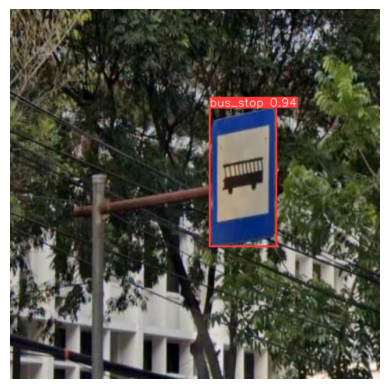

In [ ]:
# Imagen resultante (con recuadros delimitadores)
I = resultados2[0].plot()

# Mostrar la figura
plt.imshow(I[:,:,::-1])
plt.axis('off');